## LOADING THE CSV DATA

In [93]:
import pandas as pd
df = pd.read_csv("data.csv")
df

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


## EXTRACTING FEATURES AND CORRESPONDING TARGETS

In [94]:
X = df['SIZE'].values.reshape(-1,1)
y = df['PRICE'].values

## NORMALIZING THE FEATURES

In [95]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

## UTIL FUNCTIONS FOR COMPUTING MSE AND GRADIENT DESCENT

In [96]:
import numpy as np
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, m, c, learning_rate=0.01, momentum=0.9, epochs=10):
    n = len(X)
    errors = []

    # Init momentum terms
    v_m = 0
    v_c = 0

    best_error = float('inf')
    best_params = (m, c)

    for epoch in range(epochs):
        # Compute predictions
        y_pred = m * X + c

        # Compute error
        error = compute_mse(y, y_pred)
        errors.append(error)

        # Save best parameters
        if error < best_error:
            best_error = error
            best_params = (m, c)

        if epoch % 100 == 0:  # Print every 100 epochs
            print(f"Epoch {epoch}, Error: {error:.4f}")

        # Compute gradients
        dm = (-2/n) * np.sum(X * (y - y_pred))
        dc = (-2/n) * np.sum(y - y_pred)

        # Update velocity terms
        v_m = momentum * v_m - learning_rate * dm
        v_c = momentum * v_c - learning_rate * dc

        # Update parameters
        m = m + v_m
        c = c + v_c

    return best_params[0], best_params[1], errors

## SET INITIAL VALUES FOR SLOPE AND INTERCEPT

In [97]:
initial_m = 0
initial_c = 0

## TRAINING THE MODEL

In [98]:
final_m, final_c, errors = gradient_descent(X_scaled.ravel(), y_scaled, initial_m, initial_c)

Epoch 0, Error: 1.0000


## FUNC TO RETURN SCALED VALUES TO ORIGINAL

In [99]:
def convert_params_to_original_scale(m, c, scaler_X, scaler_y):
    m_original = m * (scaler_y.scale_[0] / scaler_X.scale_[0])

    c_original = (c * scaler_y.scale_[0] + scaler_y.mean_[0] - m_original * scaler_X.mean_[0])

    return m_original, c_original

m_original, c_original = convert_params_to_original_scale(final_m, final_c, scaler_X, scaler_y)

## INIT DATA VISUALIZATION

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

## DATA VS REGRESSION LINE

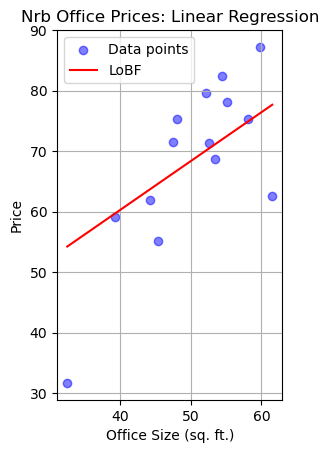

In [101]:
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
X_line = np.array([min(X), max(X)])
y_line = m_original * X_line + c_original
plt.plot(X_line, y_line.ravel(), color='red', label='LoBF')
plt.xlabel('Office Size (sq. ft.)')
plt.ylabel('Price')
plt.title('Nrb Office Prices: Linear Regression')
plt.legend()
plt.grid(True)

## ERROR OVER EPOCHS

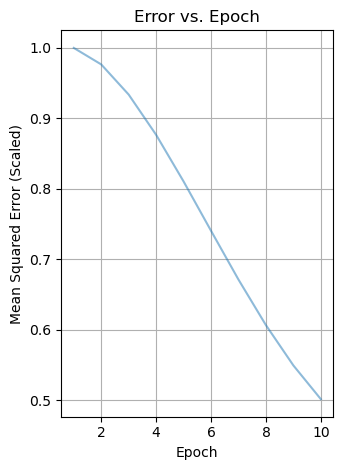

In [102]:
plt.subplot(1, 2, 2)
plt.plot(range(1, len(errors) + 1), errors, alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Scaled)')
plt.title('Error vs. Epoch')
plt.grid(True)

plt.tight_layout()
plt.show()

## PRINT FINAL RESULTS

In [103]:
print(f"Final m: {final_m:.4f}")
print(f"Final intercept (c): {final_c:.4f}")
print(f"Final MSE: {errors[-1]:.4f}")

Final m: 0.4637
Final intercept (c): 0.0000
Final MSE: 0.5016


## PREDITING USING MODEL

In [104]:
pred_size = 100
pred_price = m_original * pred_size + c_original

print(f"Predicted price for office size {pred_size} sq.ft: ${pred_price:.2f}")

Predicted price for office size 100 sq.ft: $108.73


## PRINT MODEL PERF METRICS

In [105]:
y_pred = m_original * X + c_original
final_mse = compute_mse(y, y_pred)
r2 = 1 - (np.sum((y - y_pred.ravel())**2) / np.sum((y - np.mean(y))**2))

print(f"Final MSE: {final_mse:.4f}")
print(f"R^2: {r2:.4f}")

Final MSE: 223.2070
R^2: 0.4984


## SUMMARY

In [106]:
summary_df = pd.DataFrame({
    'Actual Size': X.ravel(),
    'Actual Price': y,
    'Predicted Price': y_pred.ravel(),
    'Residual': y - y_pred.ravel()
})

print(summary_df.describe())

       Actual Size  Actual Price  Predicted Price      Residual
count    14.000000     14.000000        14.000000  1.400000e+01
mean     50.297203     68.609140        68.609140  6.090366e-15
std       8.080935     14.065415         6.522338  9.961777e+00
min      32.502345     31.707006        54.246436 -2.253943e+01
25%      45.933708     62.147288        65.087246 -2.180642e+00
50%      52.380906     71.423756        70.290952  6.520282e-01
75%      54.944550     77.506856        72.360138  7.791556e+00
max      61.530358     87.230925        77.675719  1.094116e+01
